# **CASE STUDY ON DATA AUGMENTATION**

# **DEEP LEARNING:**

Deep learning is a class of machine learning algorithms that uses multiple 
layers to progressively extract higher-level features from the raw input.

For example, in image processing, lower layers may identify edges, while higher layers may identify the concepts relevant to a human such as digits or letters or faces.

In Deep Learning, Data Augmentation is a very common technique to improve the results and overfitting.

# **DATA AUGMENTATION:**

Data Augmentation is a technique in Deep Learning which helps in adding value to our base dataset by adding the gathered information from various sources to improve the quality of data of an organisation.

Data Augmentation is one of the most important processes that makes the data very much informational.

We can augment:

**Image**

**Text**

**Audio**

**Any other types of data**

# **IMAGE AUGMENTATION:**

Image augmentation is a technique of applying different transformations to original images which results in multiple transformed copies of the same image. Each copy, however, is different from the other in certain aspects depending on the augmentation techniques you apply like shifting, rotating, flipping, etc.

Applying these small amounts of variations on the original image does not change its target class but only provides a new perspective of capturing the object in real life. And so, we use it is quite often for building deep learning models.


These image augmentation techniques not only expand the size of your dataset but also incorporate a level of variation in the dataset which allows your model to generalize better on unseen data. Also, the model becomes more robust when it is trained on new, slightly altered images.

So, with just a few lines of code, we can instantly create a large corpus of similar images without having to worry about collecting new images, which is not feasible in a real-world scenario. Now, let’s see how it’s done with the good old Keras library!

# **Image augmentation in Keras**


**Keras** **ImageDataGenerator** class provides a quick and easy way to augment our images. It provides a host of different augmentation techniques like standardization, rotation, shifts, flips, brightness change, and many more.

However, the main benefit of using the Keras ImageDataGenerator class is that it is designed to provide real-time data augmentation. Meaning it is generating augmented images on the fly while our model is still in the training stage

ImageDataGenerator class ensures that the model receives new variations of the images at each epoch. But it only returns the transformed images and does not add it to the original corpus of images. If it was, in fact, the case, then the model would be seeing the original images multiple times which would definitely overfit our model.

Another advantage of ImageDataGenerator is that it requires lower memory usage. This is so because without using this class, we load all the images at once. But on using it, we are loading the images in batches which saves a lot of memory.

Now let’s have a look at a few augmentation techniques with Keras ImageDataGenerator class.

# **Augmentation techniques with Keras ImageDataGenerator class**

**1. Random Rotations**

Image rotation is one of the widely used augmentation techniques and allows the model to become invariant to the orientation of the object.

ImageDataGenerator class allows you to randomly rotate images through any degree between 0 and 360 by providing an integer value in the rotation_range argument.

When the image is rotated, some pixels will move outside the image and leave an empty area that needs to be filled in. You can fill this in different ways like a constant value or nearest pixel values, etc. This is specified in the fill_mode argument and the default value is “nearest” which simply replaces the empty area with the nearest pixel values.

**2. Random Shifts**

It may happen that the object may not always be in the center of the image. To overcome this problem we can shift the pixels of the image either horizontally or vertically; this is done by adding a certain constant value to all the pixels.

ImageDataGenerator class has the argument height_shift_range for a vertical shift of image and width_shift_range for a horizontal shift of image. If the value is a float number, that would indicate the percentage of width or height of the image to shift. Otherwise, if it is an integer value then simply the width or height are shifted by those many pixel values.

**3. Random Flips**

Flipping images is also a great augmentation technique and it makes sense to use it with a lot of different objects.

ImageDataGenerator class has parameters horizontal_flip and vertical_flip  for flipping along the vertical or the horizontal axis. However, this technique should be according to the object in the image. For example, vertical flipping of a car would not be a sensible thing compared to doing it for a symmetrical object like football or something else. Having said that, I am going to flip my image in both ways just to demonstrate the effect of the augmentation.

**4. Random Brightness**

It randomly changes the brightness of the image. It is also a very useful augmentation technique because most of the time our object will not be under perfect lighting condition. So, it becomes imperative to train our model on images under different lighting conditions.

Brightness can be controlled in the ImageDataGenrator class through the brightness_range argument. It accepts a list of two float values and picks a brightness shift value from that range. Values less than 1.0 darkens the image, whereas values above 1.0 brighten the image.

**5. Random Zoom**

The zoom augmentation either randomly zooms in on the image or zooms out of the image.

ImageDataGenerator class takes in a float value for zooming in the zoom_range argument. You could provide a list with two values specifying the lower and the upper limit. Else, if you specify a float value, then zoom will be done in the range [1-zoom_range,1+zoom_range].

Any value smaller than 1 will zoom in on the image. Whereas any value greater than 1 will zoom out on the image.

In this Colab we will classify images of flowers. We will build an image classifier using **tf.keras.Sequential** model and load data using **tf.keras.preprocessing.image.ImageDataGenerator.**

# **Importing Necessary Libraries**

Let's start by importing required packages.

**os** package is used to read files and directory structure.

**numpy** is used to convert python list to numpy array and to perform required matrix operations.

**matplotlib.pyplot** is used to plot the graph and display images in our training and validation data.

**glob** module is used to retrieve files/pathnames matching a specified pattern.

**Shutil** module offers high-level operation on a file like a copy, create, and remote operation on the file

In [ ]:
import os
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt

# **Importing TensorFlow and Keras Layers**

In the cell below, importing **Tensorflow** and the **Keras layers** which are used to build our CNN.

In [ ]:
import tensorflow as tf

Let us discuss the use case of the libraries which are imported below:

**A Sequential model** is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

**The Dense layer** is a normal fully connected layer in a neuronal network.

**Keras Conv2D** is a 2D Convolution Layer, this layer creates a convolution kernel that is wind with layers input which helps produce a tensor of outputs.

**The keras maxpooling2d** uses the class name as maxpool2d and it will use the tf keras layers, maxpooling2d class. It contains the integer or 2 integer's tuples factors which is used to downscale the spatial dimension. It contains the max pooling operation into the 2D spatial data.

**Flatten** is used to flatten the input. For example, if flatten is applied to layer having input shape as (batch_size, 2,2), then the output shape of the layer will be (batch_size, 4)

**The dropout layer** ignores a set of neurons randomly).This normally is used to prevent the net from overfitting.

Also, importing the **ImageDataGenerator** from Keras so that we can perform image augmentation.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# **Loading the Data**

In order to build our image classifier, we can begin by downloading the flowers dataset. We first need to download the archive version of the dataset and after the download we are storing it to "**/tmp/**" directory.

After downloading the dataset, we need to extract its contents.

In [ ]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(origin=_URL,
                                   fname="flower_photos.tgz",
                                   extract=True)

base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')

The dataset we downloaded contains images of 5 types of flowers:

**Rose**

**Daisy**

**Dandelion**

**Sunflowers**

**Tulips**

So, let's create the labels for these 5 classes:

# **Creating Labels**

In [ ]:
classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

Also, the dataset we have downloaded has following directory structure. <pre style="font-size: 10.0pt; font-family: Arial; line-height: 2; letter-spacing: 1.0pt;" >
<b>flower_photos</b>
|__ <b>daisy</b>
|__ <b>dandelion</b>
|__ <b>roses</b>
|__ <b>sunflowers</b>
|__ <b>tulips</b>
</pre>

As we can see there are no folders containing training and validation data. Therefore, we will have to create our own training and validation set. Let's write some code that will do this.


The code below creates a `train` and a `val` folder each containing 5 folders (one for each type of flower). It then moves the images from the original folders to these new folders such that 80% of the images go to the training set and 20% of the images go into the validation set. In the end our directory will have the following structure:


<pre style="font-size: 10.0pt; font-family: Arial; line-height: 2; letter-spacing: 1.0pt;" >
<b>flower_photos</b>
|__ <b>daisy</b>
|__ <b>dandelion</b>
|__ <b>roses</b>
|__ <b>sunflowers</b>
|__ <b>tulips</b>
|__ <b>train</b>
    |______ <b>daisy</b>: [1.jpg, 2.jpg, 3.jpg ....]
    |______ <b>dandelion</b>: [1.jpg, 2.jpg, 3.jpg ....]
    |______ <b>roses</b>: [1.jpg, 2.jpg, 3.jpg ....]
    |______ <b>sunflowers</b>: [1.jpg, 2.jpg, 3.jpg ....]
    |______ <b>tulips</b>: [1.jpg, 2.jpg, 3.jpg ....]
 |__ <b>val</b>
    |______ <b>daisy</b>: [507.jpg, 508.jpg, 509.jpg ....]
    |______ <b>dandelion</b>: [719.jpg, 720.jpg, 721.jpg ....]
    |______ <b>roses</b>: [514.jpg, 515.jpg, 516.jpg ....]
    |______ <b>sunflowers</b>: [560.jpg, 561.jpg, 562.jpg .....]
    |______ <b>tulips</b>: [640.jpg, 641.jpg, 642.jpg ....]
</pre>

Since we don't delete the original folders, they will still be in our `flower_photos` directory, but they will be empty. The code below also prints the total number of flower images we have for each type of flower. 

In [ ]:
for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  num_train = int(round(len(images)*0.8))
  train, val = images[:num_train], images[num_train:]

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
    shutil.move(t, os.path.join(base_dir, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val', cl))
    shutil.move(v, os.path.join(base_dir, 'val', cl))

roses: 641 Images
daisy: 633 Images
dandelion: 898 Images
sunflowers: 699 Images
tulips: 799 Images


In [ ]:
round(len(images)*0.8)

639

For convenience, let us set up the path for the training and validation sets

In [ ]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

# **Data Augmentation**

Overfitting generally occurs when we have small number of training examples. One way to fix this problem is to augment our dataset so that it has sufficient number of training examples. **Data augmentation** takes the approach of generating more training data from existing training samples, by augmenting the samples via a number of random transformations that yield believable-looking images. The goal is that at training time, our model will never see the exact same picture twice. This helps expose the model to more aspects of the data and generalize better.

In **tf.keras** we can implement this using the same ImageDataGenerator class we used before. We can simply pass different transformations we would want to our dataset as a form of arguments and it will take care of applying it to the dataset during our training process.

# **Experimenting with Various Image Transformations**

Before we begin making transformations let's define our **batch_size** and our **image_size**. Remember that the input to our CNN are images of the same size. We therefore have to resize the images in our dataset to the same size.

**Seting Batch and Image Size**

In the cell below,we are creating a batch_size of 100 images and seting a value to **IMG_SHAPE** such that our training data consists of images with width of 150 pixels and height of 150 pixels.

In [ ]:
batch_size = 100
IMG_SHAPE = 150 

# **1.Applying Random Horizontal Flip**

In the cell below, we are using **ImageDataGenerator** to create a transformation that rescales the images by 255 and then applies a random horizontal flip. Then use the .**flow_from_directory** method to apply the above transformation to the images in our training set. We have to make sure to indicate the batch size, the path to the directory of the training images, the target size for the images, and to shuffle the images.

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True) #rescaling

train_data_gen = image_gen.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE)
                                                )

Found 2935 images belonging to 5 classes.


Let's take 1 sample image from our training examples and repeat it 7 times so that the augmentation can be applied to the same image 7 times over randomly, to see the augmentation in action.

In [ ]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 7, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()


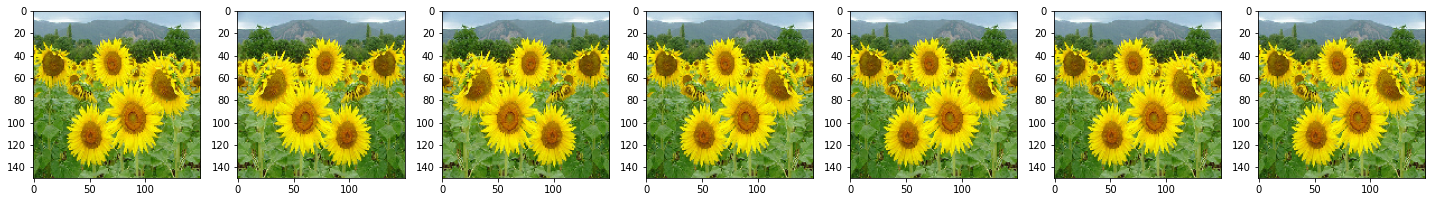

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(7)]
plotImages(augmented_images)

# **2.Applying Random Vertical Flip**

In the cell below, we are using **ImageDataGenerator** to create a transformation that rescales the images by 255 and then applies a random vertical flip. Then use the .**flow_from_directory** method to apply the above transformation to the images in our training set. We have to make sure to indicate the batch size, the path to the directory of the training images, the target size for the images, and to shuffle the images.

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, vertical_flip=True) #rescaling

train_data_gen = image_gen.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE)
                                                )

Found 2935 images belonging to 5 classes.


Let's take 1 sample image from our training examples and repeat it 7 times so that the augmentation can be applied to the same image 7 times over randomly, to see the augmentation in action.

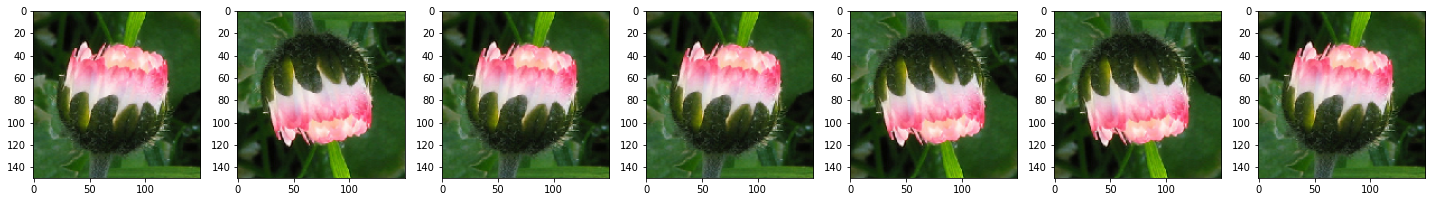

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(7)]
plotImages(augmented_images)

# **3.Applying Random Zoom**

In the cell below, we are use **ImageDataGenerator** to create a transformation that rescales the images by 255 and then applies a random zoom of up to 75%. Then use the .**flow_from_directory** method to apply the above transformation to the images in our training set.We have to make sure to indicate the batch size, the path to the directory of the training images, the target size for the images, and to shuffle the images.

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.75)

train_data_gen = image_gen.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE, IMG_SHAPE)
                                                )

Found 2935 images belonging to 5 classes.


Let's take 1 sample image from our training examples and repeat it 7 times so that the augmentation can be applied to the same image 7 times over randomly, to see the augmentation in action.

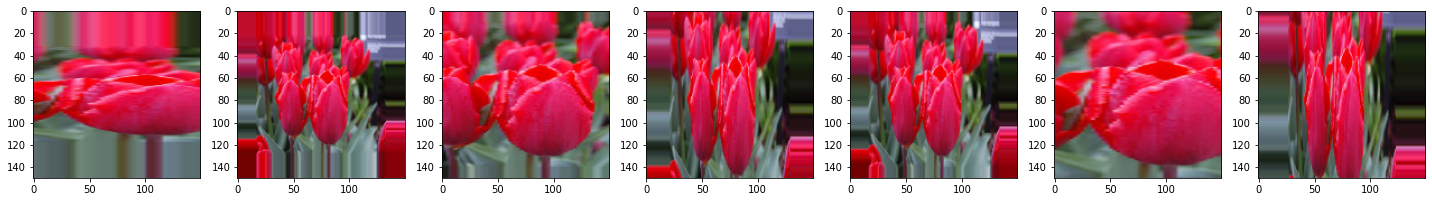

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(7)]
plotImages(augmented_images)

Now, let's do the same procedure to do some augmentation tasks

# **4.Applying Random Width Shifts**

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, width_shift_range=0.2)

train_data_gen = image_gen.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE, IMG_SHAPE)
                                                )

Found 2935 images belonging to 5 classes.


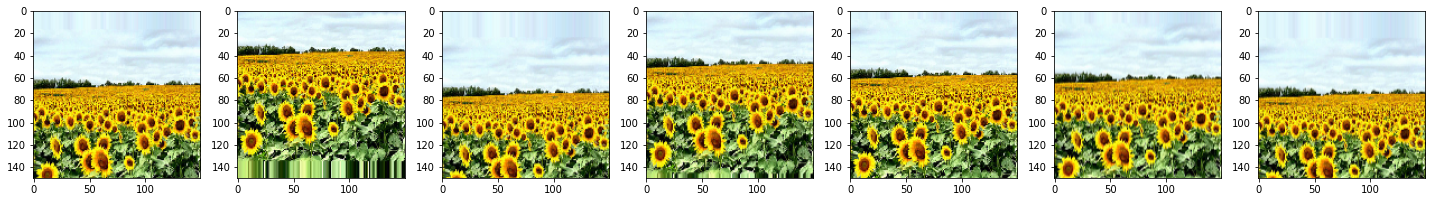

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(7)]
plotImages(augmented_images)

# **5.Applying Random Height Shifts**

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, height_shift_range=0.2)

train_data_gen = image_gen.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE, IMG_SHAPE)
                                                )

Found 2935 images belonging to 5 classes.


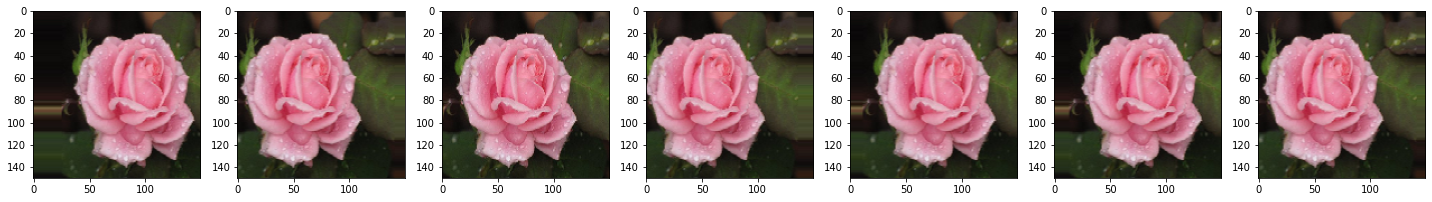

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(7)]
plotImages(augmented_images)

# **6.Applying Random Rotations**

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255,rotation_range=30, fill_mode='nearest')

train_data_gen = image_gen.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE, IMG_SHAPE)
                                                )

Found 2935 images belonging to 5 classes.


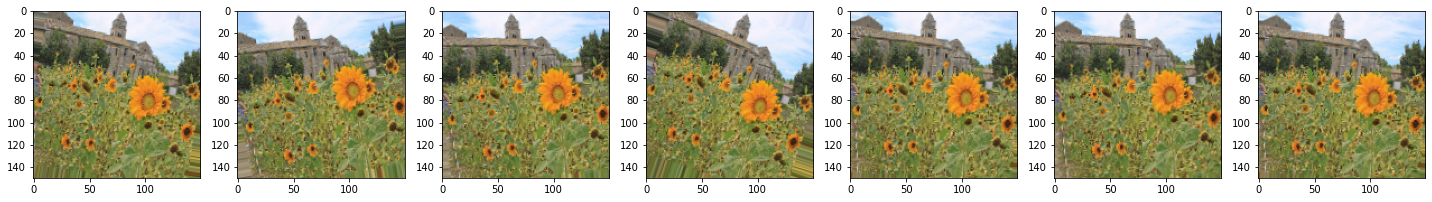

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(7)]
plotImages(augmented_images)

# **7.Applying Random Brightness**

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255,brightness_range=[0.2,2.5])

train_data_gen = image_gen.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE, IMG_SHAPE)
                                                )

Found 2935 images belonging to 5 classes.


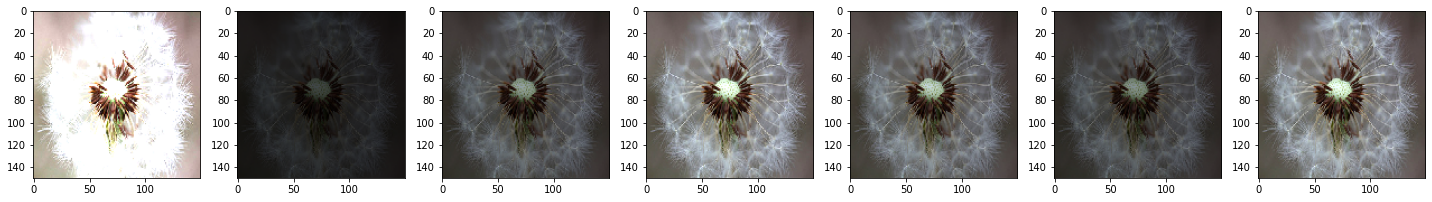

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(7)]
plotImages(augmented_images)

# **8.Applying It All Together**

In the cell below, use ImageDataGenerator to create a transformation that rescales the images by 255 and that applies:

random 45 degree rotation

random zoom of up to 50%

random horizontal flip

width shift of 0.15

height shift of 0.15

brightness_range upto 1.5

Then use the .flow_from_directory method to apply the above transformation to the images in our training set. Make sure you indicate the batch size, the path to the directory of the training images, the target size for the images, to shuffle the images, and to set the class mode to sparse.

In [ ]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5,
                    brightness_range=[0.5,1.5]

                    )


train_data_gen = image_gen_train.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='sparse'
                                                )

Found 2935 images belonging to 5 classes.


Let's visualize how a single image would look like 7 different times, when we pass these augmentations randomly to our dataset.

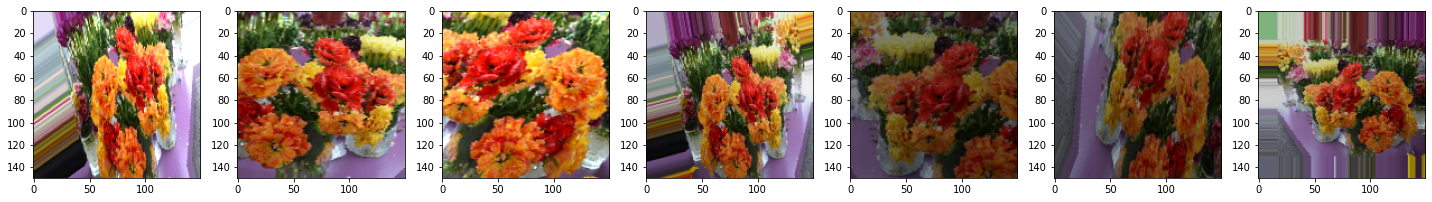

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(7)]
plotImages(augmented_images)

# **Creating a Data Generator for the Validation Set**

Generally, we only apply data augmentation to our training examples. So, in the cell below, we can use **ImageDataGenerator** to create a transformation that only rescales the images by 255. Then use the .**flow_from_directory** method to apply the above transformation to the images in our validation set. We have to make sure that we indicate the batch size, the path to the directory of the validation images, the target size for the images, and to set the class mode to sparse. Remember that it is not necessary to shuffle the images in the validation set.

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=val_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='sparse')

Found 735 images belonging to 5 classes.


# **Creating the CNN**

In the cell below, creating a **convolutional neural network** that consists of 3 convolution blocks. Each convolutional block contains a **Conv2D layer** followed by a **max pool layer**.

The first convolutional block should have 16 filters, the second one should have 32 filters, and the third one should have 64 filters. All convolutional filters should be 3 x 3. All max pool layers should have a pool_size of (2, 2).

After the 3 convolutional blocks we should have a **flatten layer** followed by a fully connected layer with 512 units. The CNN should output class probabilities based on 5 classes which is done by the **softmax** activation function. All other layers should use a relu activation function. We should also add **Dropout layers** with a probability of 20%, where appropriate.

In [ ]:
model = Sequential()

model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(5))

# **Compiling the Model**

In the cell below, compiling our model using the **ADAM optimizer**, the sparse cross entropy function as a loss function. We would also like to look at training and validation accuracy on each epoch as we train our network, so make sure you also pass the metrics argument.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# **Training the Model**

In the cell below, train your model using the **fit_generator** function instead of the usual **fit** function. We have to use the `fit_generator` function because we are using the **ImageDataGenerator** class to generate batches of training and validation data for our model. We are training the model for 80 epochs and make sure you use the proper parameters in the **fit_generator** function.

In [ ]:
epochs = 80

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(batch_size))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(batch_size)))
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/80
30/30 [==============================] - 126s 4s/step - loss: 1.7879 - accuracy: 0.2763 - val_loss: 1.3657 - val_accuracy: 0.4000
Epoch 2/80
30/30 [==============================] - 113s 4s/step - loss: 1.3505 - accuracy: 0.4269 - val_loss: 1.1711 - val_accuracy: 0.4939
Epoch 3/80
30/30 [==============================] - 120s 4s/step - loss: 1.2212 - accuracy: 0.4947 - val_loss: 1.1681 - val_accuracy: 0.5116
Epoch 4/80
30/30 [==============================] - 103s 3s/step - loss: 1.1704 - accuracy: 0.5240 - val_loss: 1.0434 - val_accuracy: 0.5823
Epoch 5/80
30/30 [==============================] - 97s 3s/step - loss: 1.1102 - accuracy: 0.5506 - val_loss: 0.9541 - val_accuracy: 0.6381
Epoch 6/80
30/30 [==============================] - 98s 3s/step - loss: 1.0867 - accuracy: 0.5649 - val_loss: 0.9478 - val_accuracy: 0.6286
Epoch 7/80
30/30 [==============================] - 96s 3s/step - loss: 1.0564 - accuracy: 0.5727 - val_loss: 0.9326 - val_accuracy: 0.6340
Epoch 8/80
30/30

Here is the result we got after training the model for 80 epochs

# **Ploting Training and Validation Graphs.**

In the cell below, plot the training and validation accuracy/loss graphs.

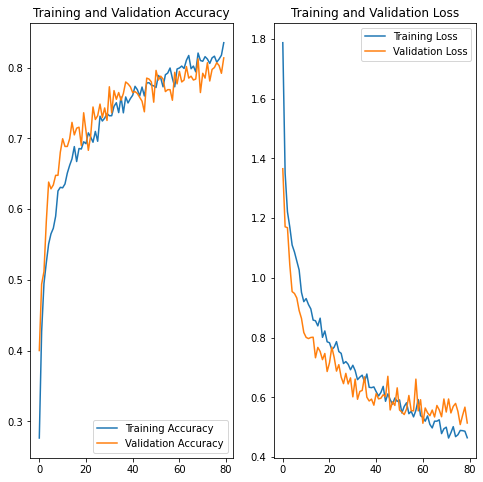

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

As we can notice here, the training and validation loss are both decreasing here with little divergence . Also,we can notice that how the training and validation accuracy is increasing together. They are comparatively closer which reduces the possibility of underfitting.But we can see that validation accuracy is slightly decreasing and validation loss is slightly increasing after some epochs.

Other that that , our model is good fit and also gave us better accuracy.

**Such is the power of augmentation that our model is able to generalize on the images now!**

Thus we created a model using data augmentation with 83% accuracy .

We can conclude that, this data augmentation tools make the data rich and sufficient and thus makes the model perform better and accurately.

Also,data augmentation techniques reduce the operational costs by introducing transformation in the datasets and assists in data cleaning, which is essential for high accuracy models.

Now, lets do image augmentation using a single image .

Let us demonstrate the following augmentation procedures in a single image.

**Rotation**

**Width and Height Shifts**

**Brightness**

**Shear transformation**

**Zoom**

**Channel Shift**

**Horizontal and Vertical Flips**

# **Importing Libraries**

In [1]:
import os
import numpy as np
import tensorflow as tf
%matplotlib inline

from PIL import Image
from matplotlib import pyplot as plt


# **Applying Data Augmentation**

**1.Rotation**

In [2]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 40
)

In [7]:
#zip file
from zipfile import ZipFile
file_name = "data.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


Found 1 images belonging to 1 classes.
(1, 256, 256, 3)
[[[[147.       188.         0.      ]
   [146.28825  185.15298    8.541031]
   [145.55061  182.20244   17.392677]
   ...
   [237.51222  246.12805  195.04887 ]
   [241.       247.       209.      ]
   [241.       247.       209.      ]]

  [[147.       188.         0.      ]
   [147.       188.         0.      ]
   [147.       188.         0.      ]
   ...
   [238.98749  246.49687  200.94998 ]
   [241.       247.       209.      ]
   [241.       247.       209.      ]]

  [[147.       188.         0.      ]
   [147.       188.         0.      ]
   [147.       188.         0.      ]
   ...
   [240.46277  246.86569  206.85107 ]
   [241.       247.       209.      ]
   [241.       247.       209.      ]]

  ...

  [[195.       192.       173.      ]
   [195.       192.       173.      ]
   [194.59708  191.73138  171.92554 ]
   ...
   [100.40292   96.40292   25.      ]
   [101.50938   97.50938   25.      ]
   [102.61584   98.61584   25

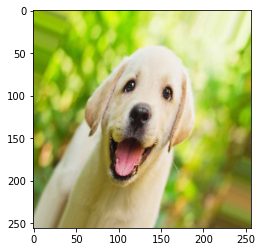

In [8]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
print(x.shape)
print(x)

plt.imshow(x[0].astype('uint16'));

**2.Width and Height Shifts**

Found 1 images belonging to 1 classes.


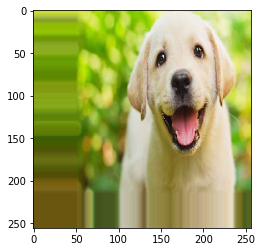

In [11]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=[-40, -20, 0, 20, 40],
    height_shift_range=[-50,50]
)
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

**3.Brightness**

Found 1 images belonging to 1 classes.


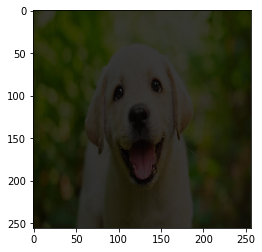

In [12]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    brightness_range=(0., 2.)
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

**4.Shear Transformation**

Found 1 images belonging to 1 classes.


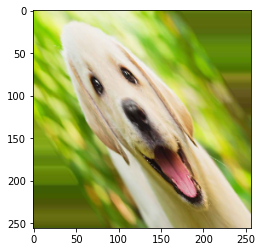

In [13]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    shear_range=45
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

**5.Zoom**

Found 1 images belonging to 1 classes.


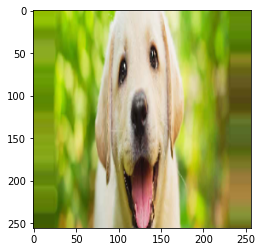

In [15]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range=0.7
)


x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

**6.Channel Shift**

Found 1 images belonging to 1 classes.


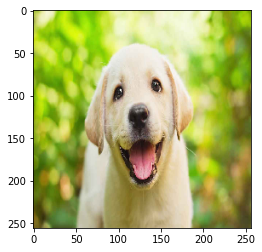

In [16]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    channel_shift_range=100
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

**7.Flips**

Found 1 images belonging to 1 classes.


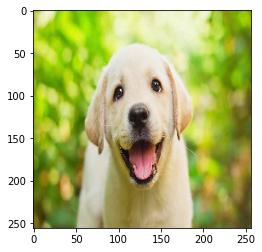

In [17]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

**Thus we have successfully augmented the image.**